# Trabalho Prático 1
Introdução à Inteligência Artificial - DCC642
- Tema: Agentes conversacionais de busca
- Professora: Gisele L. Pappa
- Aluna: Carla Beatriz Ferreira
- Data: 18/05//2025
- Valor: 15 pontos
- Documentação disponível em https://docs.google.com/document/d/1otLG8l551rNKOhsFqHR0AGeyiCqThphwiAW5-ELpzxo/edit?usp=sharing

In [1]:
!pip install scikit-learn osmnx pandas matplotlib smolagents[litellm]


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt

Importação tal qual no tutorial do Hugging Face:

In [3]:
from smolagents import LiteLLMModel

model = LiteLLMModel(
    model_id="ollama_chat/qwen2:7b",  # Or try other Ollama-supported models
    api_base="http://127.0.0.1:11434",  # Default Ollama local server
    num_ctx=8192,
)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
G = ox.graph.graph_from_place(
    "belo horizonte - MG", 
    network_type="walk",
    custom_filter='["highway"~"primary|secondary|tertiary"]'
)
place = "Belo Horizonte, Minas Gerais, Brazil" # não utilizado

In [5]:
# Associa os museus aos nós do grafo
features = ox.features.features_from_place(place, {"tourism": "museum"})
feature_points = features.representative_point()
nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)

useful_tags = ["name", "fee"]  # Ajuste com base nas colunas disponíveis
for node, feature in zip(nn, features[useful_tags].to_dict(orient="records")):
    feature = {k: v for k, v in feature.items() if pd.notna(v)}
    G.nodes[node].update({"museum": feature})

In [6]:
print(features.columns)

Index(['geometry', 'addr:city', 'addr:street', 'addr:suburb',
       'contact:facebook', 'contact:instagram', 'contact:phone',
       'contact:twitter', 'contact:website', 'contact:youtube', 'museum',
       'name', 'opening_hours', 'tourism', 'addr:housenumber', 'fee',
       'alt_name', 'contact:email', 'name:pt', 'addr:postcode', 'building',
       'historic', 'phone', 'source', 'toilets:wheelchair', 'website',
       'wheelchair', 'wikidata', 'wikimedia_commons', 'wikipedia',
       'internet_access', 'layer', 'addr:housename', 'loc_name', 'operator',
       'operator:type', 'start_date', 'email', 'toilets', 'type'],
      dtype='object')


In [7]:
print("Number of museum nodes:", len([n for n, d in G.nodes(data=True) if "museum" in d]))

Number of museum nodes: 14


In [8]:
# Verifica se os museus foram associados corretamente
print(f"Quantidade de nós no grafo: {len(G.nodes)}")
print(f"Quantidade de nós com museus: {len([n for n, d in G.nodes(data=True) if 'museum' in d])}")

Quantidade de nós no grafo: 3834
Quantidade de nós com museus: 14


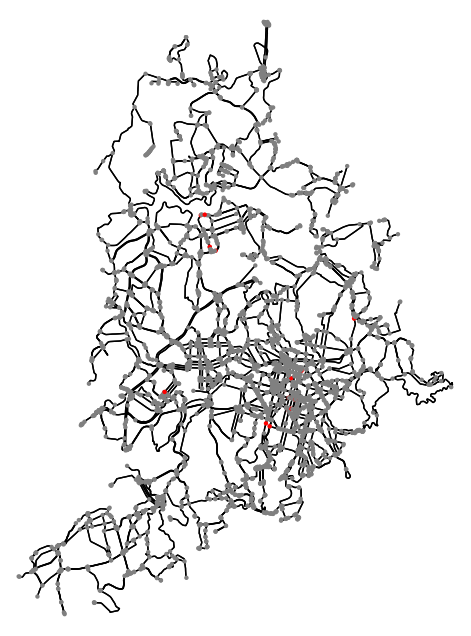

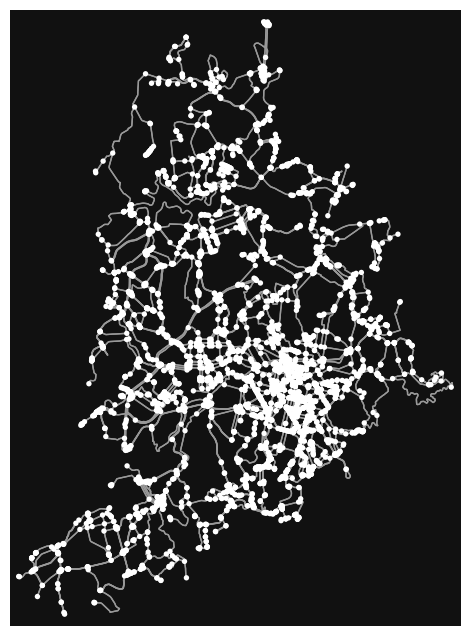

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# Identifica os nós que possuem a chave "museum"
museum_nodes = [n for n, d in G.nodes(data=True) if "museum" in d]

# Define as cores dos nós: vermelho para nós com "museum", cinza para os demais
node_colors = ["r" if n in museum_nodes else "gray" for n in G.nodes]

# Plota o grafo com as cores ajustadas
ox.plot_graph(G, node_color=node_colors, node_size=10, edge_color="k", bgcolor="w", show=False)

# plota o grafo como no enunciado
ox.plot_graph(G)

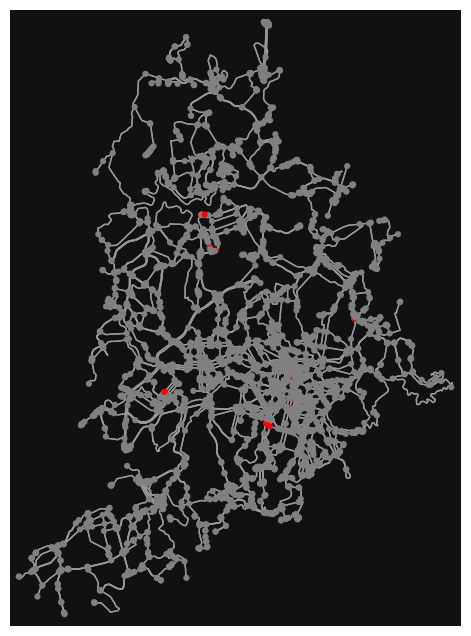

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
node_colors = ["red" if "museum" in data else "gray" for _, data in G.nodes(data=True)]
ox.plot_graph(G, node_color=node_colors, node_size=20)

Recomendação: algoritmos de busca usando a biblioteca networkx 
- A mesma já possui funções como bfs_edges(), dfs_edges(), dijkstra_path() e dijkstra_path_length()